In [79]:
import importlib
importlib.reload(WellUtil)

<module 'lib.WellUtil' from '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Personnel_Folders/Dillon_Ragar/QualityZone2/lib/WellUtil.py'>

In [20]:
import dropbox
import pandas as pd
import numpy as np
import pecos
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import missingno as msno
import plotly
import tempfile
import dtale
import pprint
import fnmatch
import io
import matplotlib
import webbrowser
import wellapplication as wa

In [2]:
from lib import ArchivalZone, WellUtil
import lib.QualityZone2 as QZ2

In [37]:
path = '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/'

In [55]:
files_1 = WellUtil.match_path(rootdir=path, pattern='*.xle', remove_comp=True); len(files_1)

Duplicates found: 0


103

In [56]:
sorted(files_1)

['/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2011/GGU_GW1_Raw_2011/1058174_GG_Well_1_2011_10_05_.xle',
 '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2011/GGU_GW1_Raw_2011/20111019GGWELL1.xle',
 '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2011/GGU_GW1_Raw_2011/20111109_GGWELL1.xle',
 '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2011/GGU_GW1_Raw_2011/20111207_GGWELL1.xle',
 '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2012/GGU_GW_1_Raw_WY2012/20120120_GGWELL1.xle',
 '/Users/dillon/Dropbox (Boulder Creek CZO)/CZO/BcCZO/Data/GordonGulch/GGU_GWW/GGU_GW1/GGU_GW1_Archival/GGU_GW1_WY2012/GGU_GW_1_Raw_WY2012/20120322_GGWell1.xle',
 '/Users/dillon/Dropbox (Bou

In [ ]:
for counter, f in enumerate(files_1):
    print(f)
    print(counter)

In [80]:
df_list = WellUtil.solinst_df(files_1)

Unknown units, no conversion
0
Unknown units, no conversion
1
Unknown units, no conversion
2
Unknown units, no conversion
3
Unknown units, no conversion
4
Unknown units, no conversion
5
Unknown units, no conversion
6
Unknown units, no conversion
7
Unknown units, no conversion
8
Unknown units, no conversion
9
Unknown units, no conversion
10
Unknown units, no conversion
11
Unknown units, no conversion
12
Unknown units, no conversion
13
Unknown units, no conversion
14
Unknown units, no conversion
15
Unknown units, no conversion
16
Unknown units, no conversion
17
Unknown units, no conversion
18
Unknown units, no conversion
19
Unknown units, no conversion
20
Unknown units, no conversion
21
Unknown units, no conversion
22
Unknown units, no conversion
23
Unknown units, no conversion
24
Unknown units, no conversion
25
Unknown units, no conversion
26
Unknown units, no conversion
27
Unknown units, no conversion
28
Unknown units, no conversion
29
Unknown units, no conversion
30
Unknown units, no 

In [81]:
df_baro = pd.concat(df_list)

In [90]:
df_baro.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 348213 entries, 2011-09-21 10:00:00 to 2018-05-05 13:20:00
Freq: 10T
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Temperature     323224 non-null  float64
 1   Level           323224 non-null  float64
 2   name            323224 non-null  object 
 3   model           323224 non-null  object 
 4   sn              323224 non-null  object 
 5   location        323224 non-null  object 
 6   Ggu_Gw2_Pducer  0 non-null       float64
dtypes: float64(3), object(4)
memory usage: 21.3+ MB


In [89]:
df_baro.index

DatetimeIndex(['2011-09-21 10:00:00', '2011-09-21 10:10:00',
               '2011-09-21 10:20:00', '2011-09-21 10:30:00',
               '2011-09-21 10:40:00', '2011-09-21 10:50:00',
               '2011-09-21 11:00:00', '2011-09-21 11:10:00',
               '2011-09-21 11:20:00', '2011-09-21 11:30:00',
               ...
               '2018-05-05 11:50:00', '2018-05-05 12:00:00',
               '2018-05-05 12:10:00', '2018-05-05 12:20:00',
               '2018-05-05 12:30:00', '2018-05-05 12:40:00',
               '2018-05-05 12:50:00', '2018-05-05 13:00:00',
               '2018-05-05 13:10:00', '2018-05-05 13:20:00'],
              dtype='datetime64[ns]', name='DateTime', length=348213, freq='10T')

In [ ]:
df_baro.sort_index(inplace=True)

In [85]:
df_baro = QZ2.drop_dup(df_baro)

In [86]:
df_baro = df_baro.asfreq('10min')

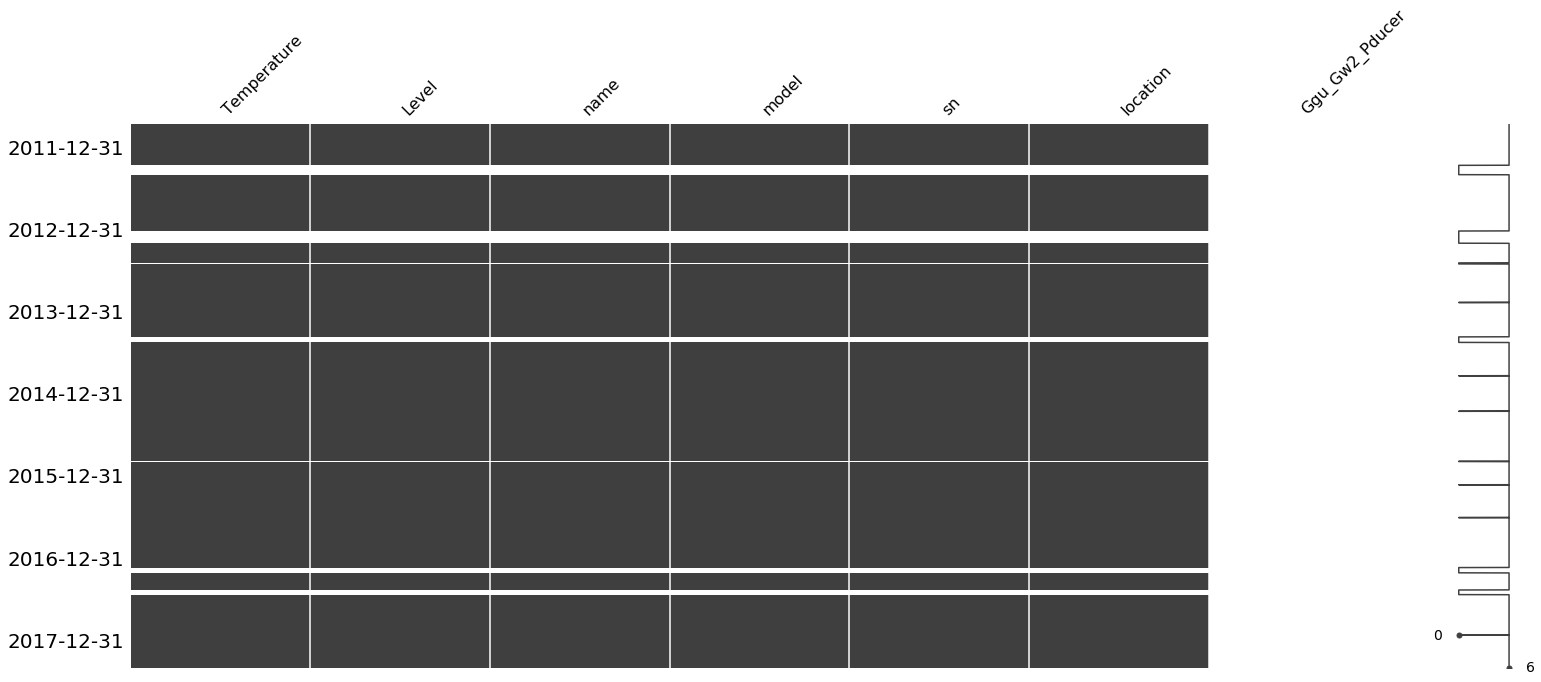

In [91]:
msno.matrix(df_baro, freq='Y')

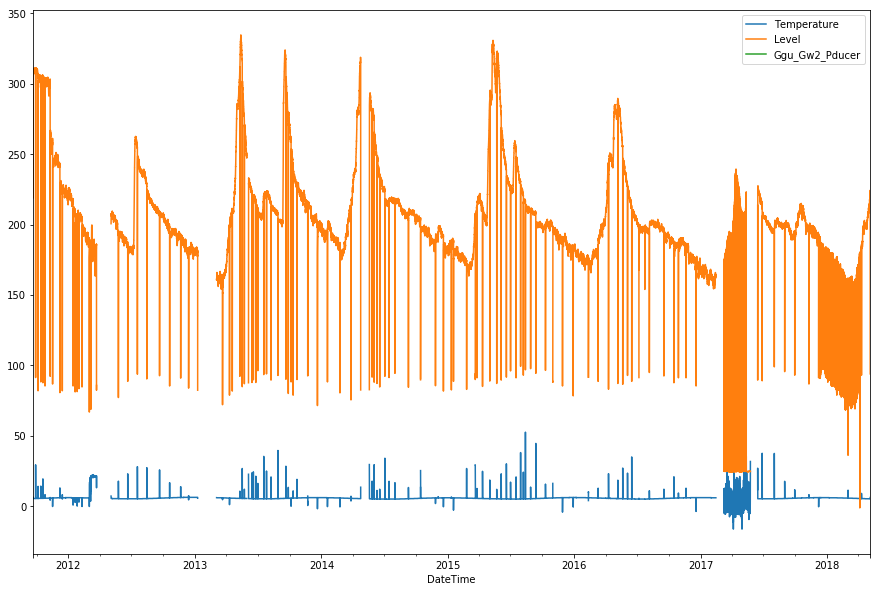

In [92]:
df_baro.plot()